<a href="https://colab.research.google.com/github/Rajat-Singh-Chouhan/calorific-value/blob/main/calorific-value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
df=pd.read_csv("/content/calorific.csv")

In [ ]:
df.head()

,Moisture (%),Ash (%),Volatile matter (%),Fixed carbon (%),Net calorific value (air-dried) (kJ/g)
0,4.19,19.45,33.19,43.17,23.91
1,1.06,20.46,31.53,46.94,23.91
2,6.60,9.56,31.49,52.35,26.22
3,9.47,14.19,30.02,46.32,23.80
4,1.84,18.10,29.43,50.63,27.73


In [ ]:
x=df.loc[:, df.columns != "Net calorific value (air-dried) (kJ/g)"]
y=df.loc[:, ["Net calorific value (air-dried) (kJ/g)"]]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 42)

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
lin_reg_model=LinearRegression()
lin_reg_model.fit(x_train,y_train)
mse=cross_val_score(lin_reg_model,x_train,y_train,scoring="neg_mean_squared_error",cv=20)

In [ ]:
mean_mse=np.mean(mse)
print(mse,mean_mse)

[-0.14471884 -0.42714105 -0.05606638 -0.53597914 -0.96832924 -1.32492957
 -0.02262274 -0.06130342 -0.79191375 -0.6974307  -0.01201437 -0.03761236
 -1.60344516 -0.62027791 -0.03124137 -0.89625792 -0.02710359 -0.03819159
 -0.29855412 -0.01789996] -0.4306516593873237


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_pred_lin_reg=lin_reg_model.predict(x_test)
r2_score_lin_reg=r2_score(y_pred_lin_reg,y_test)
print(r2_score_lin_reg)

0.8265588467176063


Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge=Ridge()
params={'alpha':[1e-4,1e-2,1,9,10,11,15,25,45,60]}
ridge_model=GridSearchCV(ridge,params,scoring="neg_mean_squared_error",cv=20)
ridge_model.fit(x_train,y_train)
y_pred_ridge=ridge_model.predict(x_test)
print(y_pred_ridge)
y_test

[[24.6454494 ]
 [24.34413162]
 [23.95127997]
 [25.38897311]
 [26.04047407]
 [23.72748466]
 [22.78423352]]


,Net calorific value (air-dried) (kJ/g)
52,24.49
58,24.04
0,23.91
44,25.21
5,27.10
36,23.59
16,22.38


In [ ]:
mse_ridge=cross_val_score(ridge_model,x_train,y_train,scoring="neg_mean_squared_error",cv=20)
mean_mse_ridge=np.mean(mse_ridge)
print(mse,mean_mse)
print(ridge_model.best_params_)
print(ridge_model.best_score_)

[-0.14471884 -0.42714105 -0.05606638 -0.53597914 -0.96832924 -1.32492957
 -0.02262274 -0.06130342 -0.79191375 -0.6974307  -0.01201437 -0.03761236
 -1.60344516 -0.62027791 -0.03124137 -0.89625792 -0.02710359 -0.03819159
 -0.29855412 -0.01789996] -0.4306516593873237
{'alpha': 10}
-0.42672575654934286


In [ ]:
y_pred_ridge=ridge_model.predict(x_test)
r2_score_ridge=r2_score(y_pred_ridge,y_test)
print(r2_score_ridge)

0.79198012900907


Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso=Lasso()
lasso.fit(x_train,y_train)
y_pred_lasso=lasso.predict(x_test)
print(y_pred_lasso)
y_test

[24.44050397 26.03624084 23.47644955 25.40419673 24.82229543 23.82725954
 23.02235405]


,Net calorific value (air-dried) (kJ/g)
52,24.49
58,24.04
0,23.91
44,25.21
5,27.10
36,23.59
16,22.38


In [ ]:
r2_score_lasso=r2_score(y_pred_lasso,y_test)
print(r2_score_lasso)

-0.4227898079669876


Lasso Regression not suitable

Desision Tree Algorithm

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_model=DecisionTreeRegressor(criterion='squared_error', min_samples_split=2, min_samples_leaf=1, max_features="sqrt")
mse_dt=cross_val_score(dt_model,x_train,y_train,scoring="neg_mean_squared_error",cv=20)
mean_mse_dt=np.mean(mse_dt)
print(mse,mean_mse)
dt_model.fit(x_train,y_train)

[-0.14471884 -0.42714105 -0.05606638 -0.53597914 -0.96832924 -1.32492957
 -0.02262274 -0.06130342 -0.79191375 -0.6974307  -0.01201437 -0.03761236
 -1.60344516 -0.62027791 -0.03124137 -0.89625792 -0.02710359 -0.03819159
 -0.29855412 -0.01789996] -0.4306516593873237


DecisionTreeRegressor(max_features='sqrt')

In [ ]:
y_pred_dt=dt_model.predict(x_test)
print(y_pred_dt)
print(y_test)

[25.26 23.86 24.89 24.98 27.73 24.55 24.49]
    Net calorific value (air-dried) (kJ/g)
52                                   24.49
58                                   24.04
0                                    23.91
44                                   25.21
5                                    27.10
36                                   23.59
16                                   22.38


In [ ]:
dt_score=dt_model.score(x_test,y_test)
print(dt_score)

0.4326575975426732


<function matplotlib.pyplot.show>

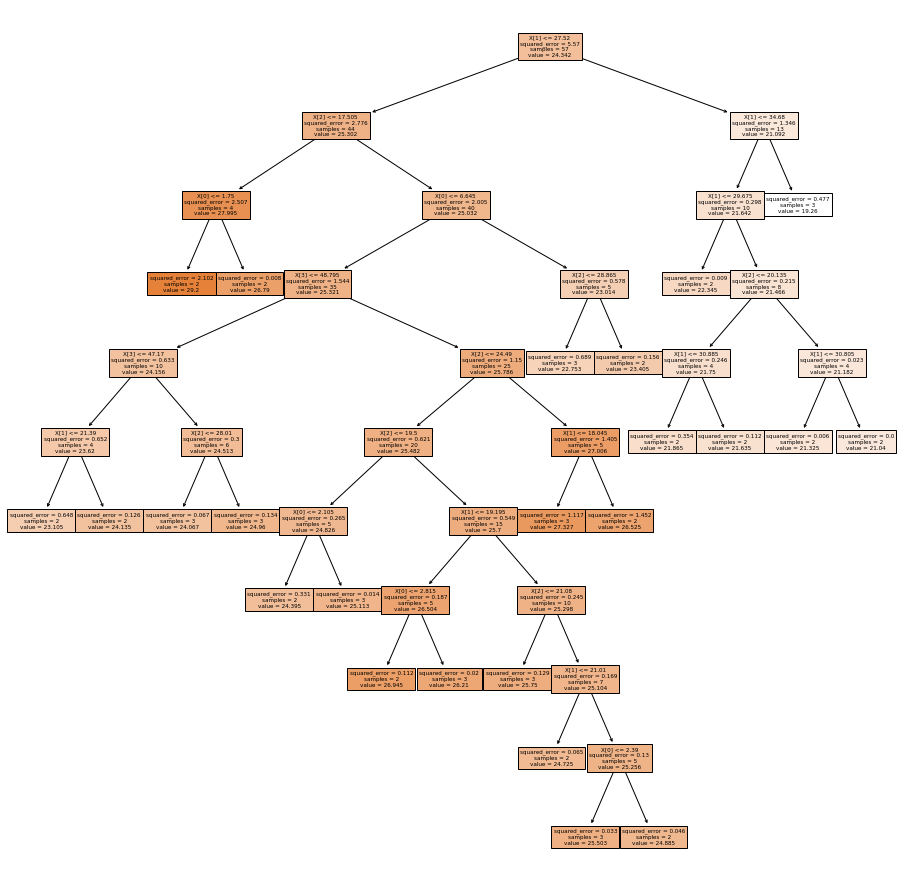

In [ ]:
from sklearn import tree
plt.figure(figsize=(16,16))
tree.plot_tree(dt_model, filled="true")
plt.show

Decision Tree not suitable

DNN Algorithm

In [ ]:
dnn_model = Sequential()
dnn_model.add(Dense(4, input_dim=4, kernel_initializer="normal", activation="relu" ))
dnn_model.add(Dense(8, activation="relu"))
dnn_model.add(Dense(16, activation="relu"))
dnn_model.add(Dense(4, activation="relu"))
dnn_model.add(Dense(1, activation="linear"))
dnn_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 8)                 40        
                                                                 
 dense_12 (Dense)            (None, 16)                144       
                                                                 
 dense_13 (Dense)            (None, 4)                 68        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 277
Trainable params: 277
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dnn_model.compile(loss="mape", optimizer="adam")
result_dnn=dnn_model.fit(x_train, y_train, epochs=500, verbose= 1, batch_size = 5, validation_split=0.1) 

Epoch 1/500
11/11 [==============================] - 1s 22ms/step - loss: 106.5158 - val_loss: 103.0395
Epoch 2/500
11/11 [==============================] - 0s 9ms/step - loss: 101.5759 - val_loss: 100.1864
Epoch 3/500
11/11 [==============================] - 0s 6ms/step - loss: 99.7603 - val_loss: 99.4952
Epoch 4/500
11/11 [==============================] - 0s 5ms/step - loss: 99.3732 - val_loss: 99.1600
Epoch 5/500
11/11 [==============================] - 0s 4ms/step - loss: 98.9548 - val_loss: 98.7173
Epoch 6/500
11/11 [==============================] - 0s 5ms/step - loss: 98.3897 - val_loss: 97.9836
Epoch 7/500
11/11 [==============================] - 0s 5ms/step - loss: 97.3934 - val_loss: 96.4216
Epoch 8/500
11/11 [==============================] - 0s 5ms/step - loss: 94.9169 - val_loss: 92.4409
Epoch 9/500
11/11 [==============================] - 0s 5ms/step - loss: 88.8917 - val_loss: 83.4023
Epoch 10/500
11/11 [==============================] - 0s 5ms/step - loss: 76.4312 - va

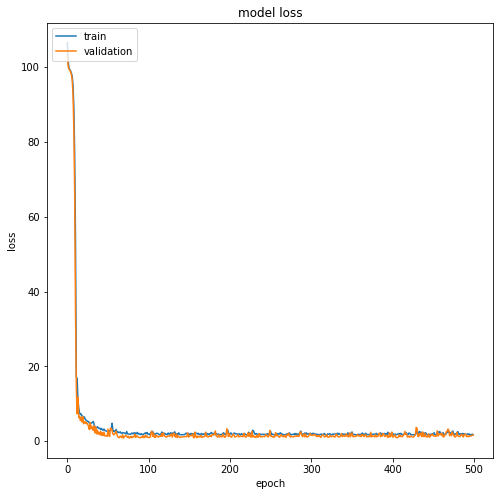

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(result_dnn.history['loss'])
plt.plot(result_dnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

2/2 [==============================] - 0s 6ms/step - loss: 1.7886


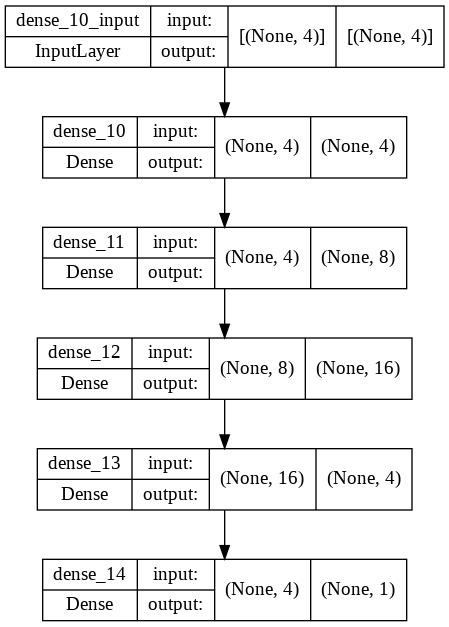

In [ ]:
scores = dnn_model.evaluate(x_train, y_train, verbose=1)
import tensorflow as tf
tf.keras.utils .plot_model(dnn_model,to_file='simple.png',show_shapes=True)

In [ ]:
wt=dnn_model.weights
print(wt)

[<tf.Variable 'dense_10/kernel:0' shape=(4, 4) dtype=float32, numpy=
array([[-0.09923577, -0.1641448 , -0.05503149,  0.00621747],
       [-0.02051949,  0.00663993,  0.03633565, -0.01383044],
       [ 0.15093657, -0.01676724, -0.07749331,  0.04715376],
       [ 0.1563888 ,  0.0489939 , -0.00693736, -0.0399984 ]],
      dtype=float32)>, <tf.Variable 'dense_10/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.07822461, -0.00111909, -0.04388905,  0.        ], dtype=float32)>, <tf.Variable 'dense_11/kernel:0' shape=(4, 8) dtype=float32, numpy=
array([[ 0.646164  , -0.704842  ,  0.551749  , -0.10336781,  0.42472658,
         0.79423684,  0.56908286, -0.03676946],
       [ 0.5340035 ,  0.19071686,  0.2575347 ,  0.625971  ,  0.3672672 ,
         0.41276392,  0.33557382, -0.27424288],
       [ 0.41245386, -0.5285683 ,  0.25703728, -0.47672555,  0.43873453,
        -0.2969773 ,  0.28615737,  0.6354397 ],
       [-0.1748656 , -0.1388889 ,  0.6981979 ,  0.02069813, -0.34313047,
         0.59398884

In [ ]:
res=dnn_model.predict(x_test)
print(res)

[[24.781773]
 [24.101322]
 [24.108568]
 [25.53768 ]
 [26.440794]
 [23.918383]
 [22.91368 ]]


In [ ]:
y_test

,Net calorific value (air-dried) (kJ/g)
52,24.49
58,24.04
0,23.91
44,25.21
5,27.10
36,23.59
16,22.38


In [ ]:
r2_score_dnn=r2_score(res,y_test)
print(r2_score_dnn)

0.8683991473000614
